In [ ]:
import numpy as np
import cv2 as cv
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern

### LBP

In [ ]:
def lbp_features(img, radius=1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) > 2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # converting to uint8 type for 256 graylevels
    img = img.astype(np.uint8)
    
    # normalize values can also help improving description
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max - i_min != 0):
        img = (img - i_min)/(i_max-i_min)
    
    # compute LBP
    lbp = local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), 
                             range=(0, sampling_pixels + 2))
    
    #n_bins = int(lbp.max() + 1)
    #(hist, _)= np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))

    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist, lbp

def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

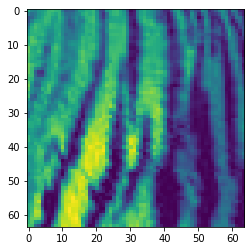

In [ ]:
cheetah1 = cv.imread('/content/aug_0_6121912.jpg', 0)
jaguar = cv.imread('/content/aug_201_2366444.jpg', 0)
tiger = cv.imread('/content/aug_400_2644356.jpg', 0)
cheetah2 = cv.imread('/content/aug_6_3461307.jpg', 0)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=127.0, tileGridSize=(8,8))
clahe_cheetah1 = clahe.apply(cheetah1)
clahe_cheetah2 = clahe.apply(cheetah2)
clahe_tiger = clahe.apply(tiger)
clahe_jaguar = clahe.apply(jaguar)


hist1, lbp1 = lbp_features(clahe_cheetah1, 1, 8)
hist2, lbp2 = lbp_features(clahe_jaguar, 1, 8)
hist3, lbp3 = lbp_features(clahe_tiger, 1, 8)
hist4, lbp4 = lbp_features(clahe_cheetah2, 1, 8)

In [ ]:
dQ2_H = Euclidean_distance(hist1, hist2)
dQ3_H = Euclidean_distance(hist1, hist3)
dQ4_H = Euclidean_distance(hist1, hist4)

Text(0.5, 1.0, 'Euclidean_distance : 0.1792')

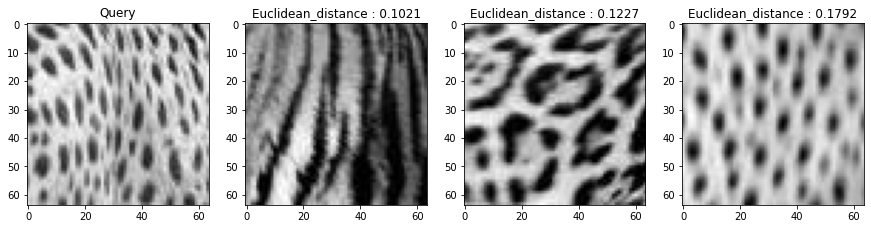

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(141); plt.imshow(cheetah1, cmap='gray'); plt.title('Query')
plt.subplot(142); plt.imshow(tiger, cmap='gray'); plt.title('Euclidean_distance : %.4f' % dQ3_H)
plt.subplot(143); plt.imshow(jaguar, cmap='gray'); plt.title('Euclidean_distance : %.4f' % dQ2_H)
plt.subplot(144); plt.imshow(cheetah2, cmap='gray'); plt.title('Euclidean_distance : %.4f' % dQ4_H)

Text(0.5, 1.0, 'Euclidean_distance : 0.1930')

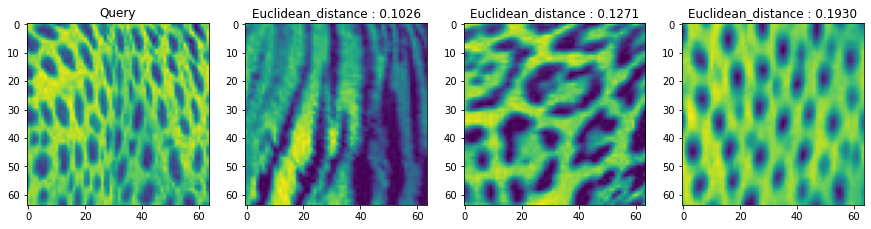

(-0.8900000000000001, 9.89, 0.0, 0.36888427725369033)

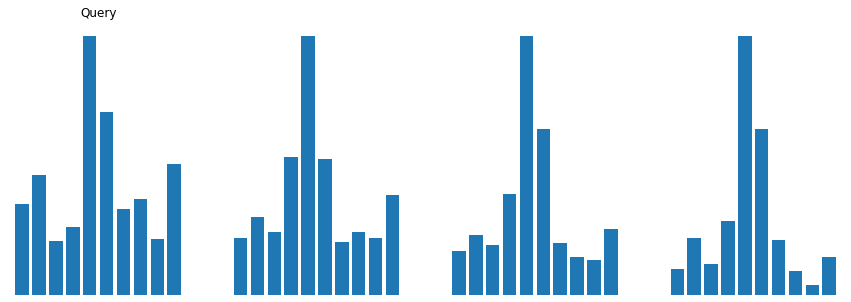

In [ ]:
vals = range(len(hist1))
plt.figure(figsize=(15,5))

plt.subplot(141); plt.bar(vals,hist1); 
plt.title('Query'); plt.axis('off')

plt.subplot(142); plt.bar(vals,hist3); 
plt.title(''); plt.axis('off')

plt.subplot(143); plt.bar(vals,hist2); 
plt.title(''); plt.axis('off')

plt.subplot(144); plt.bar(vals,hist4); 
plt.title(''); plt.axis('off')

(-0.8900000000000001, 9.89, 0.0, 0.39118652334199544)

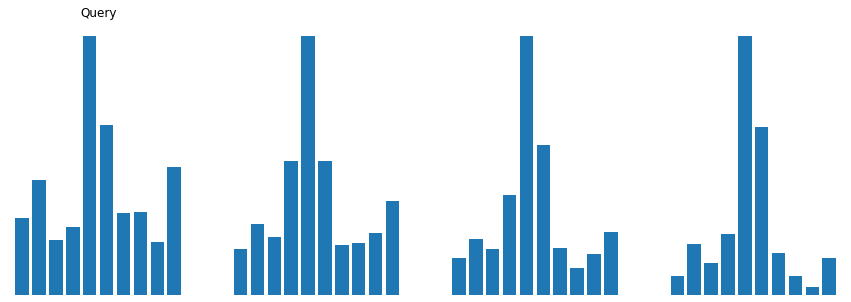